In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install kaggle

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("siddharthkumarsah/ships-in-aerial-images")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ships-in-aerial-images' dataset.
Path to dataset files: /kaggle/input/ships-in-aerial-images


In [5]:
# # 2. Импортируем модуль для работы с файлами
# import shutil

# # 3. Определяем ЦЕЛЬ на вашем Google Диске.
# # Например, создадим папку 'datasets' в 'My Drive'
# target_dir = "/content/drive/MyDrive/LENA/vessels_dataset/"

# # 4. Копируем ВСЕ содержимое папки датасета (path) на Google Диск
# # Используем shutil.copytree для копирования всей директории
# shutil.copytree(path, target_dir)

# print(f"Датасет успешно скопирован в: {target_dir}")

Датасет успешно скопирован в: /content/drive/MyDrive/LENA/vessels_dataset/


In [6]:
!pip install ultralytics
from ultralytics import YOLO

import torch
import yaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [24]:
correct_yaml_path = '/root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/correct_data.yaml'

# Проверим существует ли файл
if os.path.exists(correct_yaml_path):
    print("YAML файл существует!")

    # Прочитаем что внутри
    with open(correct_yaml_path, 'r') as f:
        content = f.read()
    print("Содержимое YAML:")
    print(content)

YAML файл существует!
Содержимое YAML:

train: /root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/train/images
val: /root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/valid/images
nc: 1
names: ['ship']



In [ ]:
dataset_base = '/root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1'

# Создаем правильный YAML файл
correct_yaml_content = {
    'train': os.path.join(dataset_base, 'ships-aerial-images/train/images'),
    'val': os.path.join(dataset_base, 'ships-aerial-images/valid/images'),
    'nc': 1,  # Количество классов
    'names': ['ship']  # Имена классов
}

# Сохраняем новый YAML файл
correct_yaml_path = '/content/correct_dataset.yaml'
with open(correct_yaml_path, 'w') as f:
    yaml.dump(correct_yaml_content, f)

print(f"Создан исправленный YAML файл: {correct_yaml_path}")
print(f"Train path: {correct_yaml_content['train']}")
print(f"Val path: {correct_yaml_content['val']}")

# Проверим существование путей
print(f"Train path exists: {os.path.exists(correct_yaml_content['train'])}")
print(f"Val path exists: {os.path.exists(correct_yaml_content['val'])}")

# Проверим количество изображений
if os.path.exists(correct_yaml_content['train']):
    train_images = [f for f in os.listdir(correct_yaml_content['train']) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Found {len(train_images)} training images")

if os.path.exists(correct_yaml_content['val']):
    val_images = [f for f in os.listdir(correct_yaml_content['val']) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Found {len(val_images)} validation images")

# Запускаем обучение
try:
    model4 = YOLO("yolov8n.pt")
    results = model4.train(
        data=correct_yaml_path,
        epochs=50,
        imgsz=640,
        batch=16,
        device='cuda',
        name='vesse_yolo8m2.0',
        mosaic=0.5,
        mixup=0.2,
        conf=0.1,
        iou=0.5
    )

except Exception as e:
    print(f"Ошибка: {e}")

    # Альтернативный вариант - используем относительные пути
    print("Пробуем с относительными путями...")

    # Создаем YAML с относительными путями
    relative_yaml_content = {
        'train': 'ships-aerial-images/train/images',
        'val': 'ships-aerial-images/valid/images',
        'nc': 1,
        'names': ['ship']
    }

    relative_yaml_path = '/content/relative_dataset.yaml'
    with open(relative_yaml_path, 'w') as f:
        yaml.dump(relative_yaml_content, f)

    # Меняем рабочую директорию
    original_cwd = os.getcwd()
    os.chdir(dataset_base)

    try:
        model4 = YOLO("yolov8n.pt")
        results = model4.train(
            data=relative_yaml_path,
            epochs=30,
            imgsz=640,
            batch=16,
            device='cuda',
            name='vesse_yolo8m2.0',
            mosaic=0.5,
            mixup=0.2,
            conf=0.1,
            iou=0.5
        )
    finally:
        os.chdir(original_cwd)

Создан исправленный YAML файл: /content/correct_dataset.yaml
Train path: /root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/ships-aerial-images/train/images
Val path: /root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/ships-aerial-images/valid/images
Train path exists: True
Val path exists: True
Found 9697 training images
Found 2165 validation images
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=0.1, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/correct_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction

In [5]:
# Распаковываем
# !unzip -qq -o archive.zip

#### **Модель - YOLO11**

In [25]:
# model = YOLO("yolo11m.pt")
# model1 = YOLO('/content/drive/MyDrive/FINAL_PRO/runs/detect/train6/weights/last.pt')
# model2 = YOLO("/content/drive/MyDrive/FINAL_PRO/2 train/weights/last.pt")
model3 = YOLO("/content/drive/MyDrive/FINAL_PRO/3 train/weights/last.pt")

In [26]:
# train модели
import os
yaml_path = '/root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/correct_data.yaml'

results = model3.train(
    data=yaml_path,
    epochs=30,
    imgsz=640,
    batch=16,
    device=DEVICE,
    name='vesse_yolo11',
    mosaic = 0.5,
    mixup = 0.2,
    )

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/correct_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=vesse_yolo8m3, nbs=64, nms=False, opset=None, optimize=False, optimi

RuntimeError: Dataset '/root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/correct_data.yaml' error ❌ Dataset '/root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/correct_data.yaml' images not found, missing path '/root/.cache/kagglehub/datasets/siddharthkumarsah/ships-in-aerial-images/versions/1/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [33]:
# inference модели

url1 = "https://img.freepik.com/premium-photo/aerial-view-tug-boat-assisting-big-bulk-carrier-cargo-ship-large-ship-escorted-by-tugboat_213438-5793.jpg"

results = model4.predict(source=url1, conf=0.5, stream=False)


image 1/1 /content/drive/MyDrive/LENA/aerial-view-tug-boat-assisting-big-bulk-carrier-cargo-ship-large-ship-escorted-by-tugboat_213438-5793.jpg: 512x640 2 ships, 216.3ms
Speed: 6.5ms preprocess, 216.3ms inference, 5.9ms postprocess per image at shape (1, 3, 512, 640)


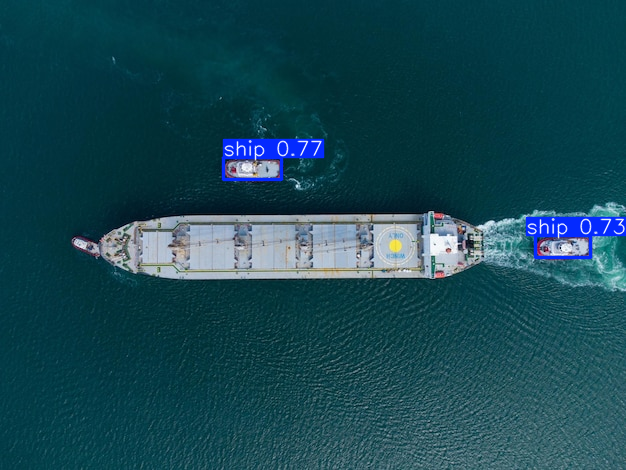

In [34]:
for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen


image 1/1 /content/drive/MyDrive/LENA/big-luxury-yacht-anchoring-water-aerial-view-active-life-style-water-transportation-marine-sport-big-luxury-yacht-anchoring-179404012.jpg: 448x640 1 ship, 121.2ms
Speed: 3.2ms preprocess, 121.2ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


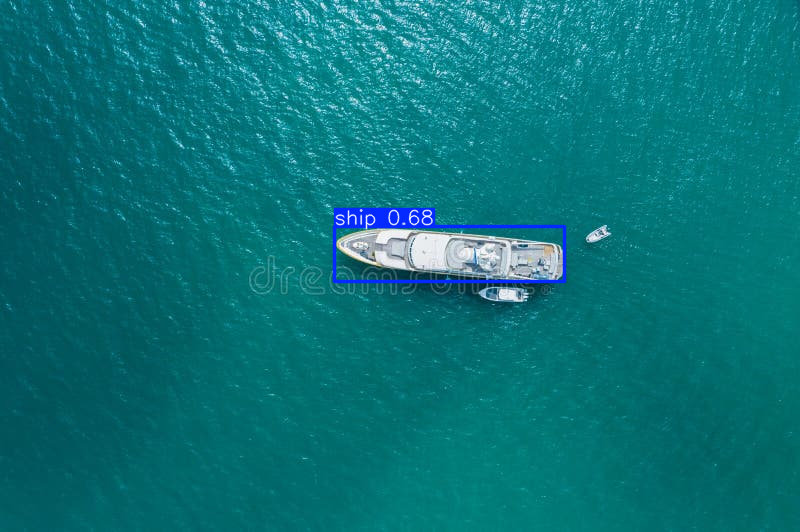

In [35]:
url2 = "https://thumbs.dreamstime.com/b/big-luxury-yacht-anchoring-water-aerial-view-active-life-style-water-transportation-marine-sport-big-luxury-yacht-anchoring-179404012.jpg"

results = model4.predict(source=url2, conf=0.5, stream=False)

for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen


image 1/1 /content/drive/MyDrive/LENA/troki.png: 448x640 2 ships, 6.6ms
Speed: 2.3ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


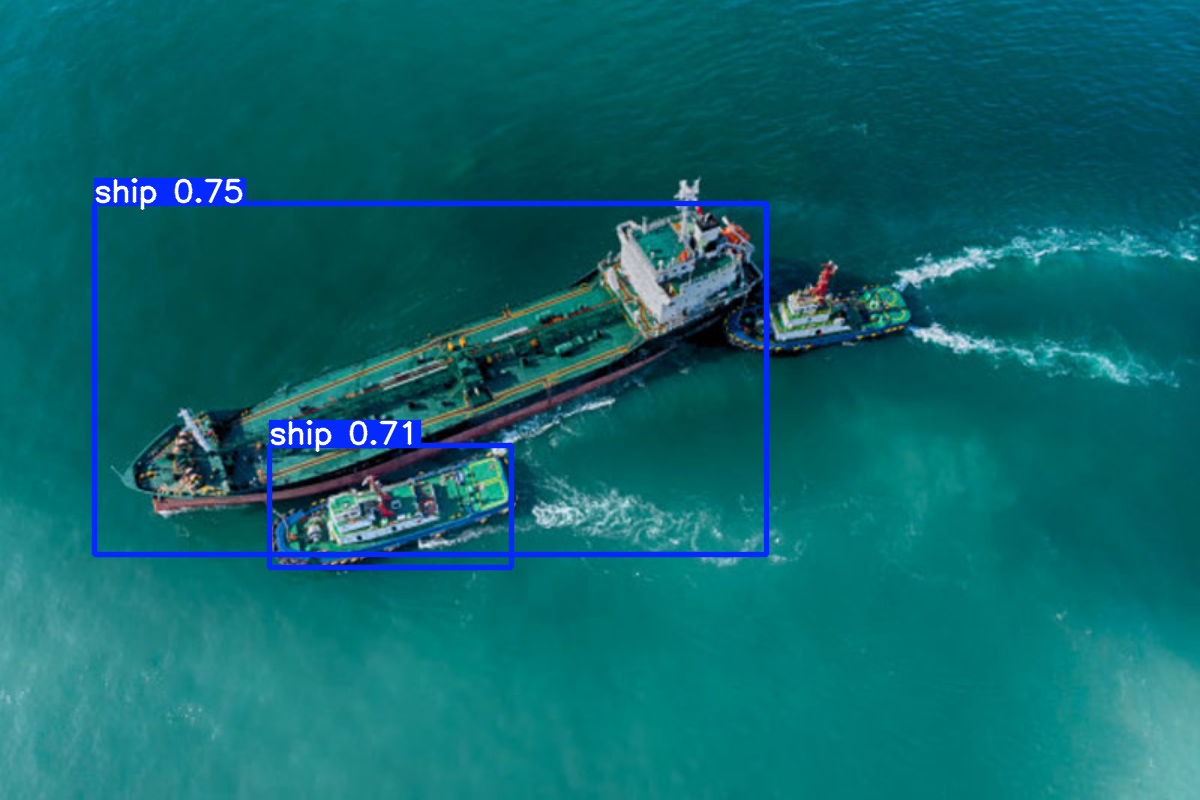

In [36]:
url3 = "https://i.pdimage.com/static/content/25-10/29/troki.png"

results = model4.predict(source=url3, conf=0.5, stream=False)

for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen


image 1/1 /content/drive/MyDrive/LENA/вид-грузового-контейнерного-судна-в-море-контейнера-261106771.jpg: 480x640 1 ship, 44.7ms
Speed: 2.5ms preprocess, 44.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


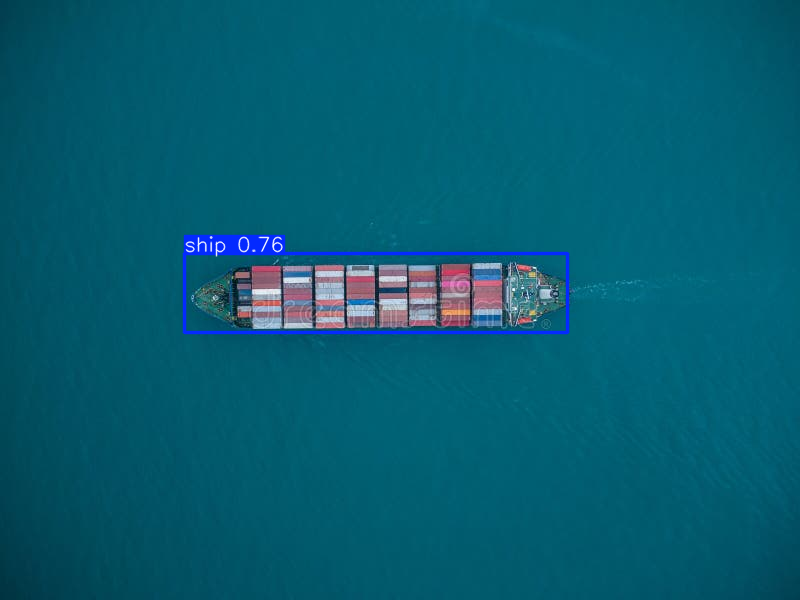

In [37]:
url4 = "https://thumbs.dreamstime.com/b/%D0%B2%D0%B8%D0%B4-%D0%B3%D1%80%D1%83%D0%B7%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE-%D0%BA%D0%BE%D0%BD%D1%82%D0%B5%D0%B9%D0%BD%D0%B5%D1%80%D0%BD%D0%BE%D0%B3%D0%BE-%D1%81%D1%83%D0%B4%D0%BD%D0%B0-%D0%B2-%D0%BC%D0%BE%D1%80%D0%B5-%D0%BA%D0%BE%D0%BD%D1%82%D0%B5%D0%B9%D0%BD%D0%B5%D1%80%D0%B0-261106771.jpg"

results = model4.predict(source=url4, conf=0.3, stream=False)

for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen

In [32]:
# сохранить модель
!cp -r /content/drive/MyDrive/LENA/runs/detect/vesse_yolo8m5 /content/drive/MyDrive/LENA
print("Модель best.pt успешно сохранена на Google Drive!")

Модель best.pt успешно сохранена на Google Drive!
